In [1]:
library(googlesheets4)
library(ggplot2)
library(ggbeeswarm)


Warning message:
"package 'ggbeeswarm' was built under R version 4.0.5"


In [2]:
sheets_auth(path = "Z:/spreadsheet-service-302407.json")

all_data <- read_sheet(
    ss="12yARRjZTZlD-tqx-bz7JYzwZ5XVVOf59o8kTbR0s4xw",
    range="shCtrl_003_shOPA1_003(論文用データ)"
)

all_data_ <- all_data[!is.na(all_data$`tubular_S/cristae_S`), ]

Warning message:
"`sheets_auth()` is deprecated as of googlesheets4 0.2.0.
Please use `gs4_auth()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Reading from "quantification_result"

Range "'shCtrl_003_shOPA1_003(論文用データ)'"

New names:
* `` -> ...5
* `` -> ...23
* `` -> ...28
* `` -> ...37
* `` -> ...40
* ...



# Mito V

Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 5 rows containing missing values (geom_point)."
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning m

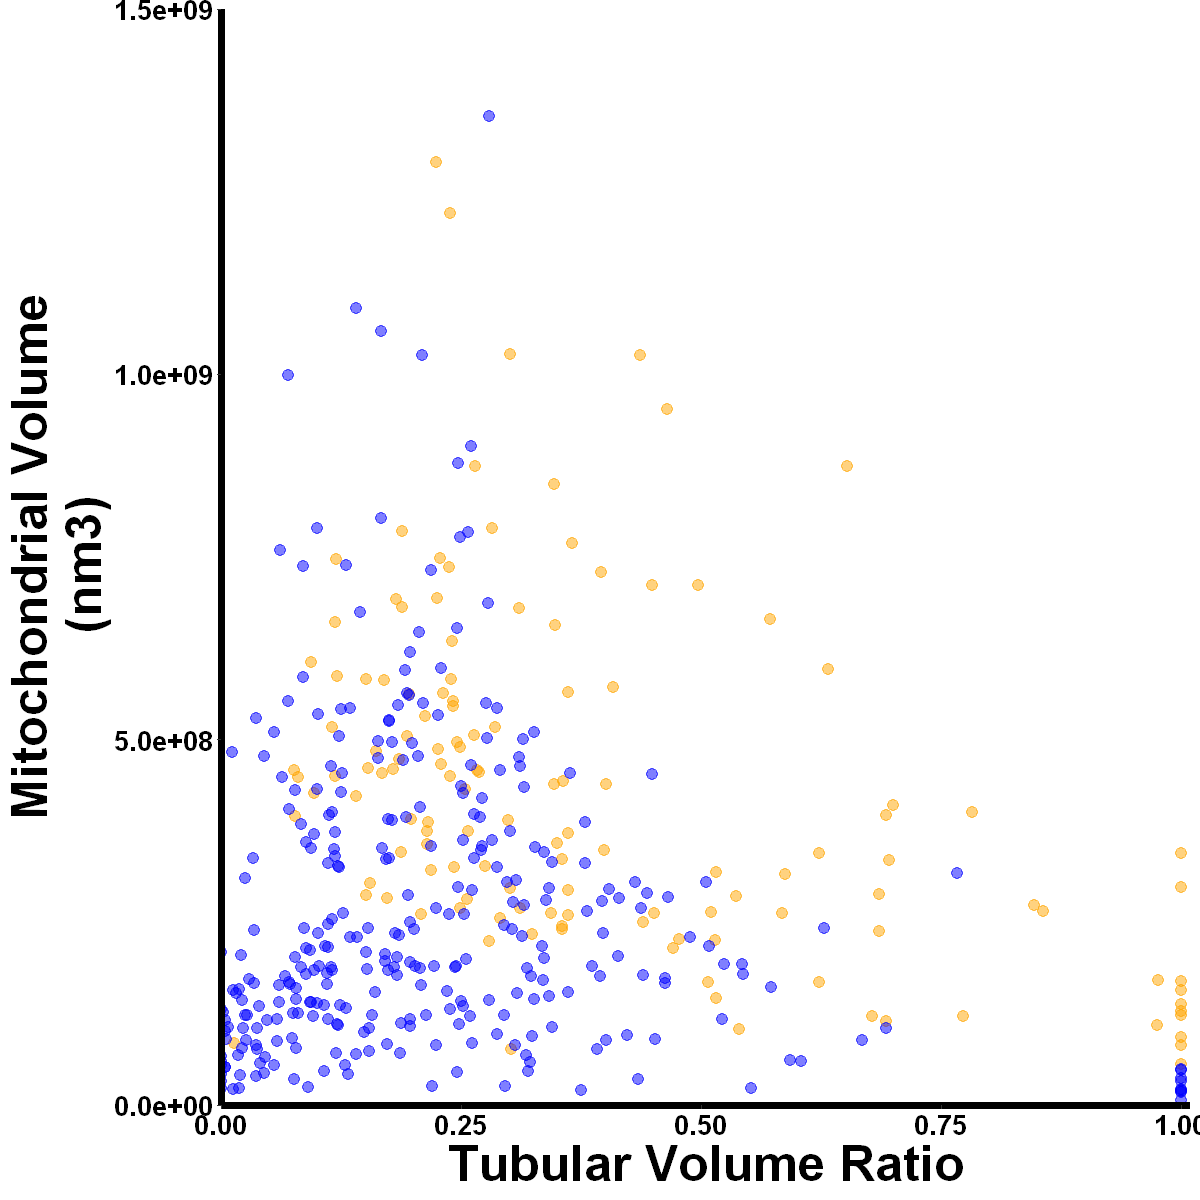

In [3]:
options(repr.plot.width=10, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.title.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 16, face = "bold", family = "Helvetica", color="black"),
    axis.text.y = element_text(size = 16, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_x_continuous(
    expand = c(0,0), 
    limits=c(0, 1.01)
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0, 1500000000)
)

graph <- graph + labs(
    y = "Mitochondrial Volume\n(nm3) ",
    x = "Tubular Volume Ratio"
) + geom_jitter(
    data = all_data_[all_data_$`Gene` == "shCtrl", ],
    aes(`tubular_V/cristae_V`, `mito_V_nm`),
    size = 3,
    color="orange",
    alpha = 0.5
) + geom_jitter(
    data = all_data_[all_data_$`Gene` == "shOPA1", ],
    aes(`tubular_V/cristae_V`, `mito_V_nm`),
    size = 3,
    color="blue",
    alpha = 0.5
) 


graph

In [4]:
res<-lm(`tubular_V/cristae_V`~`mito_V_nm`,data=all_data_[all_data_$`Gene` == "shCtrl", ])
summary(res)


Call:
lm(formula = `tubular_V/cristae_V` ~ mito_V_nm, data = all_data_[all_data_$Gene == 
    "shCtrl", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48477 -0.18234 -0.08193  0.13278  0.57659 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.220e-01  3.634e-02  14.365  < 2e-16 ***
mito_V_nm   -2.842e-10  6.647e-11  -4.276 3.61e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2431 on 133 degrees of freedom
Multiple R-squared:  0.1209,	Adjusted R-squared:  0.1142 
F-statistic: 18.28 on 1 and 133 DF,  p-value: 3.608e-05


In [5]:
res<-lm(`tubular_V/cristae_V`~`mito_V_nm`,data=all_data_[all_data_$`Gene` == "shOPA1", ])
summary(res)


Call:
lm(formula = `tubular_V/cristae_V` ~ mito_V_nm, data = all_data_[all_data_$Gene == 
    "shOPA1", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23911 -0.13032 -0.03543  0.08267  0.76295 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.410e-01  1.743e-02  13.828   <2e-16 ***
mito_V_nm   -7.956e-11  5.139e-11  -1.548    0.123    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1963 on 319 degrees of freedom
Multiple R-squared:  0.007458,	Adjusted R-squared:  0.004347 
F-statistic: 2.397 on 1 and 319 DF,  p-value: 0.1225


In [6]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS11/tubular_volume_ratio_vs_mito_V.svg", plot = graph, dpi = 100, width = 10, height = 10)


Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Removed 8 rows containing missing values (geom_point)."


# Mito Aspect Ratio

Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 8 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見

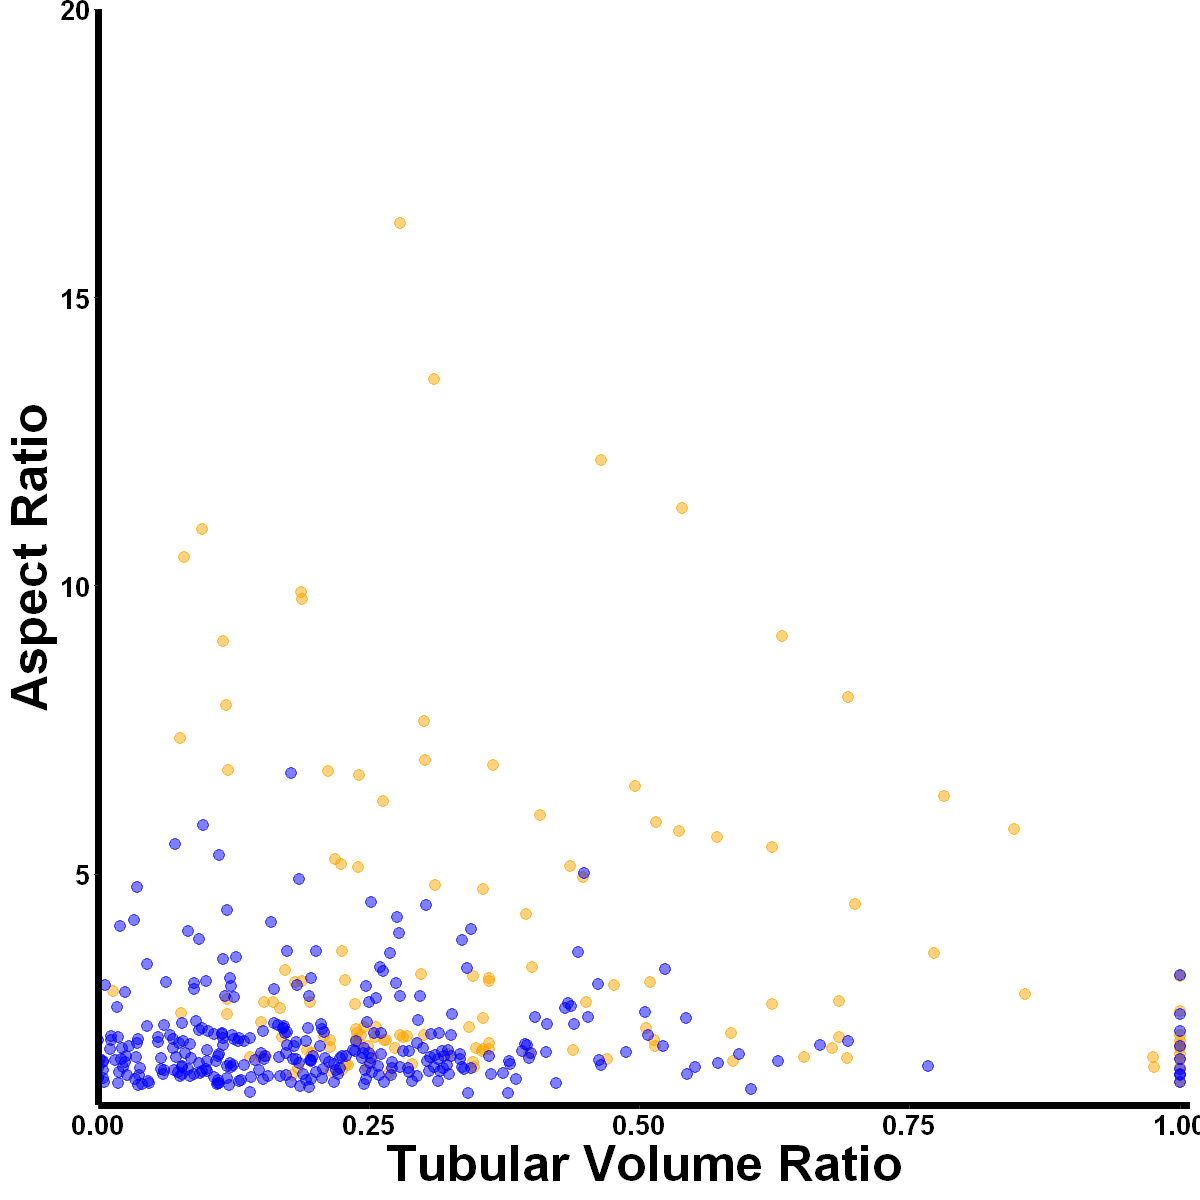

In [7]:
options(repr.plot.width=10, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.title.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 16, face = "bold", family = "Helvetica", color="black"),
    axis.text.y = element_text(size = 16, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_x_continuous(
    expand = c(0,0), 
    limits=c(0, 1.01)
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(1, 20)
)

graph <- graph + labs(
    y = "Aspect Ratio",
    x = "Tubular Volume Ratio"
) + geom_jitter(
    data = all_data_[all_data_$`Gene` == "shCtrl", ],
    aes(`tubular_V/cristae_V`, `mito_max_L/mito_min_L`),
    size = 3,
    color="orange",
    alpha = 0.5
) + geom_jitter(
    data = all_data_[all_data_$`Gene` == "shOPA1", ],
    aes(`tubular_V/cristae_V`, `mito_max_L/mito_min_L`),
    size = 3,
    color="blue",
    alpha = 0.5
) 


graph

In [8]:
res<-lm(`tubular_V/cristae_V`~`mito_max_L/mito_min_L`,data=all_data_[all_data_$`Gene` == "shCtrl", ])
summary(res)


Call:
lm(formula = `tubular_V/cristae_V` ~ `mito_max_L/mito_min_L`, 
    data = all_data_[all_data_$Gene == "shCtrl", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38676 -0.17827 -0.07979  0.11185  0.60101 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.414254   0.031540  13.134   <2e-16 ***
`mito_max_L/mito_min_L` -0.004728   0.005480  -0.863     0.39    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2585 on 133 degrees of freedom
Multiple R-squared:  0.005566,	Adjusted R-squared:  -0.001911 
F-statistic: 0.7444 on 1 and 133 DF,  p-value: 0.3898


In [9]:
res<-lm(`tubular_V/cristae_V`~`mito_max_L/mito_min_L`,data=all_data_[all_data_$`Gene` == "shOPA1", ])
summary(res)


Call:
lm(formula = `tubular_V/cristae_V` ~ `mito_max_L/mito_min_L`, 
    data = all_data_[all_data_$Gene == "shOPA1", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22044 -0.13099 -0.03924  0.07791  0.78071 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.221306   0.030183   7.332 1.88e-12 ***
`mito_max_L/mito_min_L` -0.000618   0.013196  -0.047    0.963    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1971 on 319 degrees of freedom
Multiple R-squared:  6.877e-06,	Adjusted R-squared:  -0.003128 
F-statistic: 0.002194 on 1 and 319 DF,  p-value: 0.9627


In [10]:
dir.create("Z:/paper_data/2021_cristae/for_revision_#2/figS11")
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS11/tubular_volume_ratio_vs_aspect_ratio.svg", plot = graph, dpi = 100, width = 10, height = 10)


Warning message in dir.create("Z:/paper_data/2021_cristae/for_revision_#2/figS11"):
" 'Z:\paper_data\2021_cristae\for_revision_#2\figS11' はすでに存在します "
Warning message:
"Removed 2 rows containing missing values (geom_point)."
Warning message:
"Removed 6 rows containing missing values (geom_point)."


# MCI

Warning message:
"Removed 5 rows containing missing values (geom_point)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$

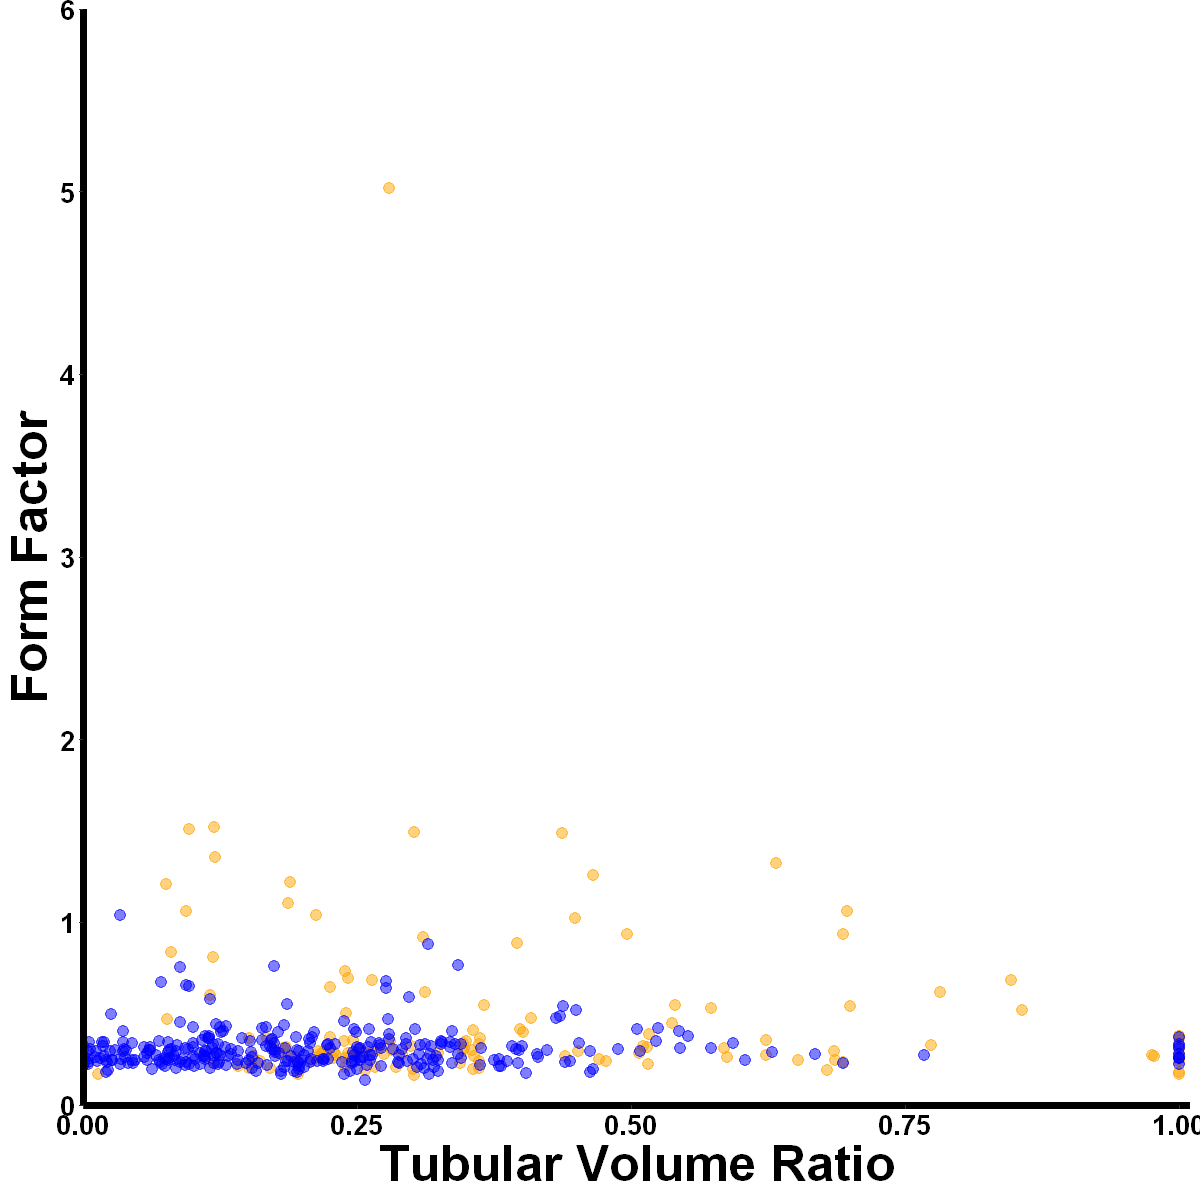

In [11]:
options(repr.plot.width=10, repr.plot.height=10)

graph <- ggplot(NULL)

graph <- graph + theme(
    axis.line = element_line(size = 2, colour="black"),
    axis.title.x = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.title.y = element_text(size = 30, face = "bold", family = "Helvetica", color="black"),
    axis.text.x = element_text(size = 16, face = "bold", family = "Helvetica", color="black"),
    axis.text.y = element_text(size = 16, face = "bold", family = "Helvetica", color="black"),
    panel.background = element_blank(), 
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
) + scale_x_continuous(
    expand = c(0,0), 
    limits=c(0, 1.01)
) + scale_y_continuous(
    expand = c(0,0), 
    limits=c(0, 6)
)

graph <- graph + labs(
    y = "Form Factor",
    x = "Tubular Volume Ratio"
) + geom_jitter(
    data = all_data_[all_data_$`Gene` == "shCtrl", ],
    aes(`tubular_V/cristae_V`, `form_factor`),
    size = 3,
    color="orange",
    alpha = 0.5
) + geom_jitter(
    data = all_data_[all_data_$`Gene` == "shOPA1", ],
    aes(`tubular_V/cristae_V`, `form_factor`),
    size = 3,
    color="blue",
    alpha = 0.5
) 


graph

In [12]:
res<-lm(`tubular_V/cristae_V`~`form_factor`,data=all_data_[all_data_$`Gene` == "shCtrl", ])
summary(res)


Call:
lm(formula = `tubular_V/cristae_V` ~ form_factor, data = all_data_[all_data_$Gene == 
    "shCtrl", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39858 -0.17799 -0.08228  0.12116  0.59945 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.42121    0.03044  13.835   <2e-16 ***
form_factor -0.05467    0.04345  -1.258    0.211    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2577 on 133 degrees of freedom
Multiple R-squared:  0.01176,	Adjusted R-squared:  0.004333 
F-statistic: 1.583 on 1 and 133 DF,  p-value: 0.2105


In [13]:
res<-lm(`tubular_V/cristae_V`~`form_factor`,data=all_data_[all_data_$`Gene` == "shOPA1", ])
summary(res)


Call:
lm(formula = `tubular_V/cristae_V` ~ form_factor, data = all_data_[all_data_$Gene == 
    "shOPA1", ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22091 -0.13479 -0.04084  0.07321  0.78328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20741    0.03237   6.408 5.29e-10 ***
form_factor  0.04148    0.10034   0.413     0.68    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.197 on 319 degrees of freedom
Multiple R-squared:  0.0005354,	Adjusted R-squared:  -0.002598 
F-statistic: 0.1709 on 1 and 319 DF,  p-value: 0.6796


In [14]:
ggsave(file = "Z:/paper_data/2021_cristae/for_revision_#2/figS11/tubular_volume_ratio_vs_form_factor.svg", plot = graph, dpi = 100, width = 10, height = 10)


Warning message:
"Removed 6 rows containing missing values (geom_point)."
